In [2]:
!pip install numpy
!pip install torch torchvision
!pip install pillow
!pip install scikit-learn
!pip install matplotlib



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import numpy as np
import torch
import torchvision.transforms as transforms
from PIL import Image
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [33]:
import torch
import torchvision.models as models
class ColorRecommendationCNN(torch.nn.Module):
    def __init__(self):
        super(ColorRecommendationCNN, self).__init__()
        self.conv1 = torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = torch.nn.Linear(64 * 56 * 56, 128)
        self.fc2 = torch.nn.Linear(128, 5)

    def forward(self, x):
        x = torch.nn.functional.relu(self.conv1(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        x = torch.nn.functional.relu(self.conv2(x))
        x = torch.nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 64 * 56 * 56)
        x = torch.nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = ColorRecommendationCNN()
model = models.resnet18(pretrained=True)
model.eval()

c:\Users\james\OneDrive\Documents\manila_social_club\manila_social_club\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\james\OneDrive\Documents\manila_social_club\manila_social_club\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [34]:
def preprocess_image(img):
    preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    return preprocess(img).unsqueeze(0)

In [35]:
def predict_colors_cnn(img_path):
    img = Image.open(img_path).convert('RGB')
    img_tensor = preprocess_image(img)
    with torch.no_grad():
        outputs = model(img_tensor)
    _, predicted = torch.max(outputs.data, 1)
    return predicted.item()

In [51]:
true_labels = [ 0, 1, 2, 2, 1, 0, 1, 2, 0, 1, 0, 0, 0, 1, 1, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 1, 1, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 2, 1, 1, 1, 0, 2, 0, 2, 1, 1, 2]
predicted_labels = [0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 2, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 1, 1, 2]

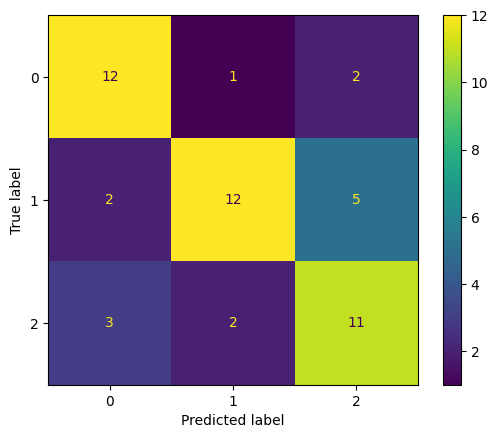

In [52]:
predicted_labels.append(0) 

cm = confusion_matrix(true_labels, predicted_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()